In [26]:
# Setup
import numpy as np
import matplotlib.pyplot as plt


from typing import Callable

Signal = Callable[[int], float]
System = Callable[[Signal], Signal]

@np.vectorize
def u(n: int) -> float:
    if n >= 0:
        return 1.
    else:
        return 0.

def dt_convolve(x1: Signal, x2: Signal, x1_support):
    """
    [support] is the support interval of x1
    """
    @np.vectorize
    def x(n: int) -> float:
        return sum(x1(x1_support) * x2(n - x1_support))
    
    return x

def shift(k: int) -> System:
    def shiftk(x: Signal) -> Signal:
        def shifted_x(n: int) -> float:
            return x(n - k)
        return shifted_x
    return shiftk



In [27]:
# Problem 1
x1 = u

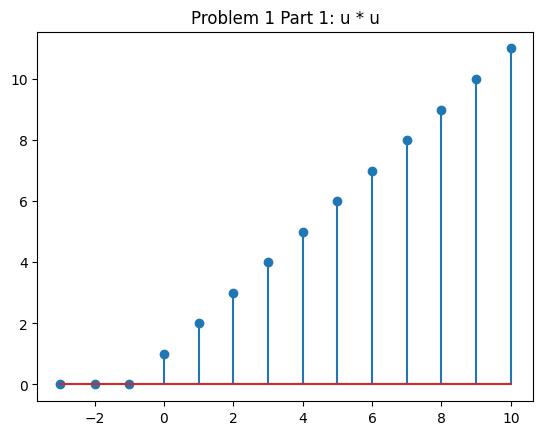

In [28]:
# Problem 1 Part 1
times = np.array(range(-3, 11))
x2 = u
x12 = dt_convolve(x1, x2, times)
plt.stem(times, x12(times))
plt.title("Problem 1 Part 1: u * u")
plt.show()


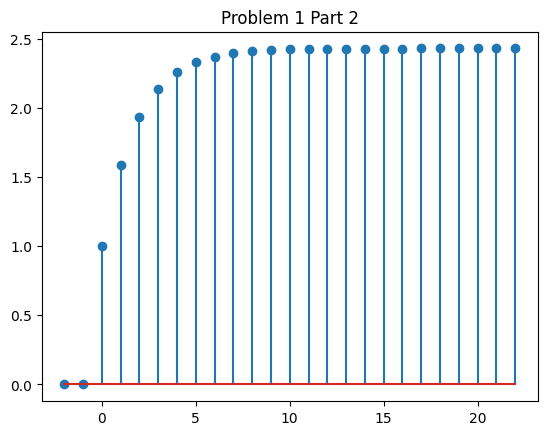

In [29]:
# Problem 1 Part 2
times = np.array(range(-2, 23))

@np.vectorize
def x2(n: int) -> float:
    return (1.7)**(-n) * u(n)

x12 = dt_convolve(x1, x2, times)

plt.stem(times, x12(times))
plt.title("Problem 1 Part 2")
plt.show()



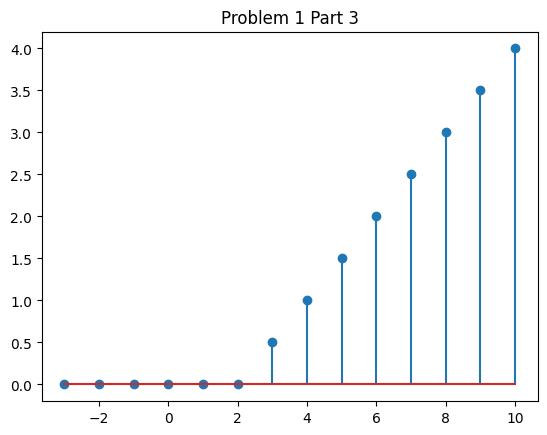

In [30]:
# Problem 1 Part 3

@np.vectorize
def x2(n: int) -> float:
    return 0.5 * shift(3)(u)(n)

times = np.array(range(-3, 11))
x12 = dt_convolve(x1, x2, times)

plt.stem(times, x12(times))
plt.title("Problem 1 Part 3")
plt.show()

In [31]:
# Problem 2
def averager(m: int) -> System:
    """
    returns an m-fold averager system
    """
    def averager_m(x: Signal) -> Signal:
        def averager_m_x(n: int) -> float:
            output = 0.
            for k in range(0, m):
                output += x(n - k)
            output /= m
            return output
        return averager_m_x
    return averager_m
        

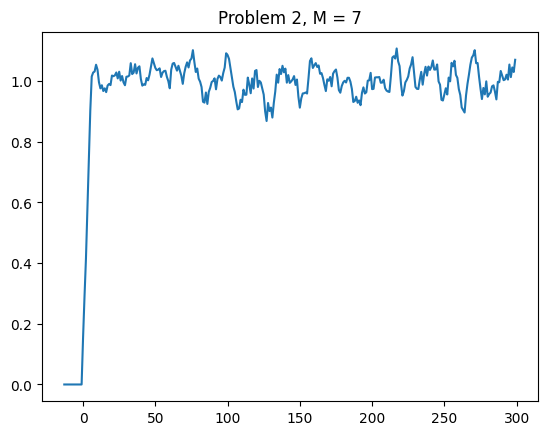

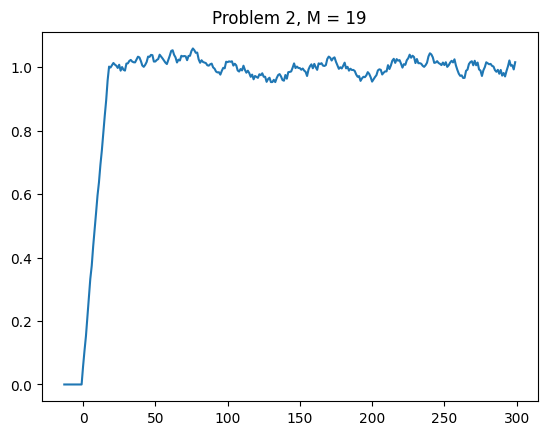

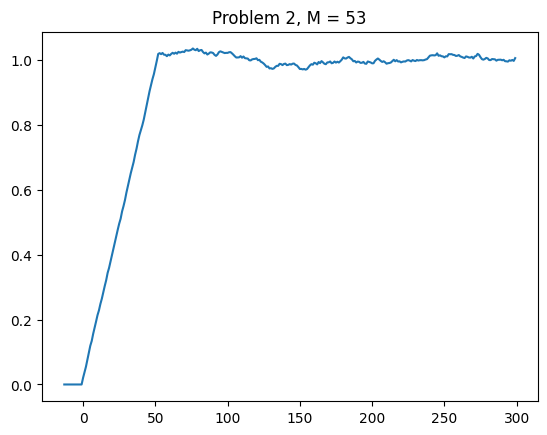

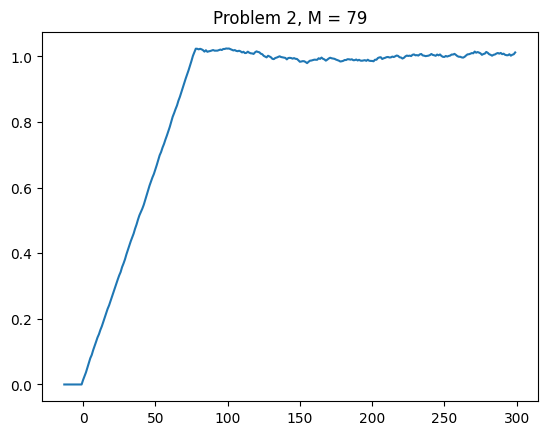

In [32]:
# Problem 2 Part 1

memo = {}

@np.vectorize()
def w(n: int) -> float:
    if n not in memo:
        memo[n] = np.random.uniform(-0.23, 0.23)
    return memo[n]

times = np.array(range(-13, 300))

@np.vectorize()
def x(n):
    return (1 + w(n)) * u(n)

times = np.array(range(-13, 300))
for m in [7, 19, 53, 79]:
    signal = averager(m)(x)
    plt.plot(times, signal(times))
    plt.title("Problem 2, M = %d"%m)
    plt.show()
    


In [33]:
# Problem 3
highest = (None, -float("inf"))
lowest = (None, float("inf"))

running_avg = 0
NUMBER_OF_ITERATIONS = 100000

for n in range(NUMBER_OF_ITERATIONS):
    running_avg += np.random.randint(-1, 2)

    if running_avg > highest[1]:
        print("New high: y(%3d) = %3d"%(n, running_avg))
        highest = (n, running_avg)
    if running_avg < lowest[1]:
        print("New low:  y(%3d) = %3d"%(n, running_avg))
        lowest = (n, running_avg)
print("Highest: y(%3d) = %3d"%highest)
print("Lowest:  y(%3d) = %3d"%lowest)

New high: y(  0) =   0
New low:  y(  0) =   0
New high: y(  2) =   1
New low:  y(  4) =  -1
New low:  y(  5) =  -2
New low:  y(  7) =  -3
New low:  y(  9) =  -4
New low:  y( 20) =  -5
New low:  y( 21) =  -6
New low:  y( 23) =  -7
New low:  y( 24) =  -8
New low:  y( 27) =  -9
New low:  y( 28) = -10
New low:  y( 29) = -11
New low:  y( 34) = -12
New low:  y( 35) = -13
New low:  y( 38) = -14
New high: y(138) =   2
New high: y(139) =   3
New high: y(140) =   4
New high: y(257) =   5
New high: y(266) =   6
New high: y(272) =   7
New high: y(290) =   8
New high: y(293) =   9
New high: y(294) =  10
New high: y(297) =  11
New high: y(318) =  12
New high: y(322) =  13
New high: y(325) =  14
New high: y(347) =  15
New high: y(353) =  16
New high: y(354) =  17
New high: y(359) =  18
New high: y(360) =  19
New high: y(366) =  20
New high: y(367) =  21
New high: y(368) =  22
New high: y(369) =  23
New high: y(376) =  24
New high: y(417) =  25
New high: y(436) =  26
New high: y(438) =  27
New high: y

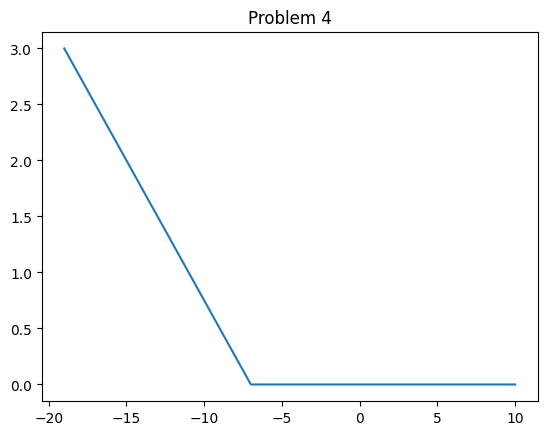

In [34]:
# Problem 4
def left_hand_convolve(x1: Signal, n2: int, x2: Signal, m2 : int) -> Signal:
    @np.vectorize
    def x12(n: int) -> float:
        if n > n2 + m2:
            return 0.
        else:
            output = 0.
            for k in range(n - m2, n2+1):
                output += x1(k) * x2(n - k)
            return output
    return x12

@np.vectorize
def x1(n):
    return 0.5 * u(-n - 1)

@np.vectorize
def x2(n):
    return 0.5 * u(7 - n)

x12 = left_hand_convolve(x1, 1, x2, -7)

times = np.array(range(-19, 11))
plt.plot(times, x12(times))
plt.title("Problem 4")
plt.show()
